In [55]:
from datasets import NYUDepth, NYUSeg
import dpt.transforms as T
import torch

In [56]:
import matplotlib.pyplot as plt
import numpy as np

In [57]:
def _get_aug_transform(train,grayscale = True, validation = True):
        base_size = 256#240
        crop_size = 180

        min_size = int((0.5 if train else 1.0) * base_size)
        max_size = int((2.0 if train else 1.0) * base_size)
        transforms = []
        tren = []
        print("Doing transform")

        # if validation:
        #     # transforms.append(T.RandomHorizontalFlip(0.5))
        #     transforms.append(T.RandomResize(base_size,base_size))
        #     # transforms.append(T.RandomCrop(crop_size))
        #     # return T.Compose(transforms)    



        # if train:
        #     transforms.append(T.RandomHorizontalFlip(0.5))
        #     transforms.append(T.RandomResize(base_size,base_size))
        #     transforms.append(T.RandomCrop(crop_size))
        #     # tren.append(T.RandomResize(base_size,base_size))


        transforms.append(T.RandomHorizontalFlip(0.5))
        transforms.append(T.RandomResize(base_size,base_size))
        transforms.append(T.RandomCrop(crop_size))

        if grayscale:
            print("using grayscale")
            transforms.append(T.Grayscale(3))
        transforms.append(T.ToTensor())
        transforms.append(T.ConvertImageDtype(torch.float))
        if grayscale:
            transforms.append(T.Normalize(mean=[0.456, 0.456, 0.456],
                                  std=[0.224, 0.224, 0.224]))
        else:
            transforms.append(T.Normalize(mean=[0.485, 0.456, 0.406],
                                  std=[0.229, 0.224, 0.225]))
            

        return T.Compose(transforms)


In [58]:
train_data_path = '/home/soumyajit/ADEChallengeData2016/images/train'
train_label_path = '/home/soumyajit/ADEChallengeData2016/annotations/train'
trans = _get_aug_transform(True,grayscale=False)

Doing transform


In [59]:
dataset = NYUSeg(train_data_path, train_label_path, transforms = trans, tolabel=(True, 'ade20k'))

In [60]:
first_input_img = dataset[1][0]
first_target_img = dataset[1][1]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


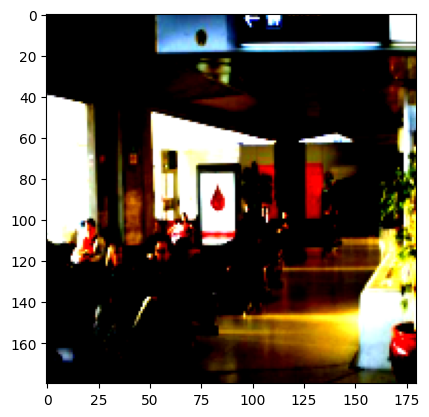

In [61]:
# Load an image
# image = plt.imread('path/to/image.jpg')

# Display the image
image = np.transpose(first_input_img, (1, 2, 0))
plt.imshow(image)
plt.show()

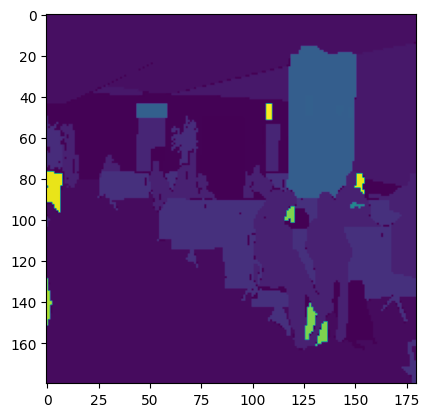

In [62]:
# Display the image
# image = np.transpose(first_target_img, (1, 2, 0))
plt.imshow(first_target_img)
plt.show()